# 4 Machine Learning Part 1

# This script contains the following:

## 1. Importing libraries and data
## 2. Data cleaning
## 3. Data prep for regression analysis
## 4. Regression analysis

## 1. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Importing Data
path = r'/Users/marialuciaguarita/Phyton Careerfoundry Project 2'
Data_s = pd.read_csv(os.path.join(path,'Data_s_cleaned'), index_col = False)

## 2. Data cleaning

In [4]:
Data_s.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id2', 'region', 'area',
       'age', 'adapt_bath', 'adapt_room', 'handrails', 'property', 'salary',
       'retirement', 'work', 'wheelchair', 'device', 'device_type',
       'd_get_up_chair', 'd_get_up_bed', 'dining_out', 'concert', 'museum',
       'leisure_trip', 'volunteer_work', 'diffic_to_eat', 'have_TV',
       'have_mobile', 'hours_of_help', 'n_children', 'device_for_the_test',
       'bedridden', 'diffic_run', 'diffic_walk', 'diffic_walk_oneblock',
       'diffic_climbing', 'time_walk_day', 'household_income'],
      dtype='object')

In [5]:
#Excludinh unecessary columns 
Data_s = Data_s[['id2', 'region', 'area','age', 'adapt_bath', 'adapt_room', 'handrails', 'property', 'salary','retirement', 'work', 'wheelchair', 'device', 'device_type','d_get_up_chair', 'd_get_up_bed', 'dining_out', 'concert', 'museum','leisure_trip', 'volunteer_work', 'diffic_to_eat', 'have_TV','have_mobile', 'hours_of_help', 'n_children', 'device_for_the_test','bedridden', 'diffic_run', 'diffic_walk', 'diffic_walk_oneblock','diffic_climbing', 'time_walk_day', 'household_income']]
Data_s.columns        

Index(['id2', 'region', 'area', 'age', 'adapt_bath', 'adapt_room', 'handrails',
       'property', 'salary', 'retirement', 'work', 'wheelchair', 'device',
       'device_type', 'd_get_up_chair', 'd_get_up_bed', 'dining_out',
       'concert', 'museum', 'leisure_trip', 'volunteer_work', 'diffic_to_eat',
       'have_TV', 'have_mobile', 'hours_of_help', 'n_children',
       'device_for_the_test', 'bedridden', 'diffic_run', 'diffic_walk',
       'diffic_walk_oneblock', 'diffic_climbing', 'time_walk_day',
       'household_income'],
      dtype='object')

In [6]:
Data_s.head(20)

,id2,region,area,age,adapt_bath,adapt_room,handrails,property,salary,retirement,...,hours_of_help,n_children,device_for_the_test,bedridden,diffic_run,diffic_walk,diffic_walk_oneblock,diffic_climbing,time_walk_day,household_income
0,20200001,1,1,60,8,8,8,0,1000.0,1692,...,71,4.0,0,3,1,0,0,1,3.00,4000.0
1,20200002,1,1,62,8,8,8,0,3800.0,1692,...,71,4.0,0,3,1,0,0,0,3.00,3800.0
2,20200003,1,1,78,8,8,8,0,1574.7,1692,...,71,6.0,0,3,1,1,1,1,1.00,2000.0
3,20200004,1,1,78,8,8,8,0,1500.0,1692,...,71,6.0,0,3,1,0,0,9,2.00,2000.0
4,20200005,1,1,89,8,8,8,0,1574.7,2000,...,71,10.0,0,3,0,0,1,1,1.00,2000.0
5,20200006,1,1,89,8,8,8,0,1574.7,1692,...,71,3.0,0,3,0,0,0,0,2.00,2000.0
6,20200007,1,1,89,8,8,8,0,1574.7,1692,...,71,0.0,0,3,0,0,0,0,6.00,2000.0
7,20200008,1,1,76,8,8,8,0,1574.7,1692,...,71,2.0,0,3,1,0,0,1,3.00,1000.0
8,20200009,1,1,59,8,8,8,0,1000.0,1000,...,71,4.0,0,3,0,0,0,0,3.00,3000.0
9,20200010,1,1,70,8,8,8,0,1574.7,1000,...,71,3.0,8,3,1,1,1,1,1.00,3000.0


In [7]:
Data_s.shape

(9905, 34)

In [8]:
# Check for missing values

Data_s.isnull().sum()

id2                     0
region                  0
area                    0
age                     0
adapt_bath              0
adapt_room              0
handrails               0
property                0
salary                  0
retirement              0
work                    0
wheelchair              0
device                  0
device_type             0
d_get_up_chair          0
d_get_up_bed            0
dining_out              0
concert                 0
museum                  0
leisure_trip            0
volunteer_work          0
diffic_to_eat           0
have_TV                 0
have_mobile             0
hours_of_help           0
n_children              0
device_for_the_test     0
bedridden               0
diffic_run              0
diffic_walk             0
diffic_walk_oneblock    0
diffic_climbing         0
time_walk_day           0
household_income        0
dtype: int64

In [9]:
# Duplicates check

dups = Data_s.duplicated()
dups.shape

(9905,)

/Users/marialuciaguarita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    9905.000000
mean       66.647350
std         9.890062
min        50.000000
25%        58.000000
50%        65.000000
75%        74.000000
max       109.000000
Name: age, dtype: float64

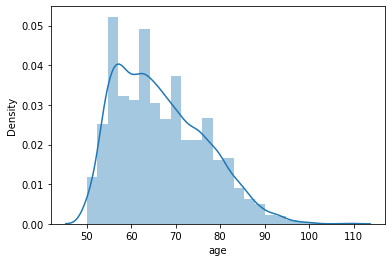

In [52]:
# Extreme values checks for age
sns.distplot(Data_s['age'], bins=25)
Data_s['age'].describe()

/Users/marialuciaguarita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_children', ylabel='Density'>

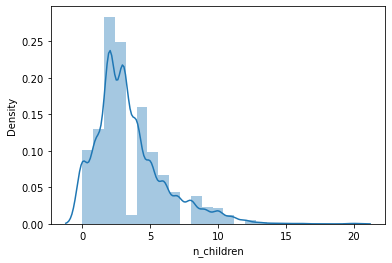

In [14]:
# Extreme values checked
sns.distplot(Data_s_children['n_children'], bins=25)

Hypothesis: The older a person is, the more children they have.
P.S.:  this is not the main hypothesis of my study, which involves categorical variables.

## 3. Data prep for regression analysis 

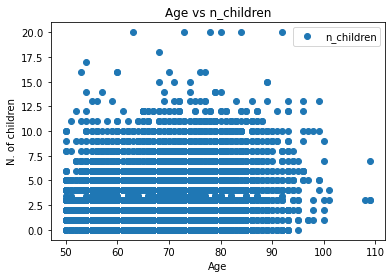

In [55]:
# Create a scatterplot using matplotlib - how the chosen variables plot against each other.

Data_s.plot(x = 'age', y='n_children', style='o') 
plt.title('Age vs n_children')  
plt.xlabel('Age')  
plt.ylabel('N. of children')  
plt.show()

In [56]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Data_s_children['age'].values.reshape(-1,1)
y = Data_s_children['n_children'].values.reshape(-1,1)

In [57]:
X

array([[60],
       [62],
       [78],
       ...,
       [54],
       [66],
       [65]])

In [58]:
y

array([[4.],
       [4.],
       [6.],
       ...,
       [1.],
       [3.],
       [5.]])

In [59]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [60]:
# Create a regression object.

regression = LinearRegression()

In [61]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

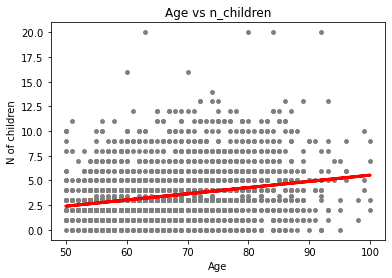

In [63]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs n_children')
plot_test.xlabel('Age')
plot_test.ylabel('N of children')
plot_test.show()

In [64]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [65]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06281014]]
Mean squared error:  6.4987250569772845
R2 score:  0.06090933262760301


1 - Positive slope indicates a positive relationship between age and n of children(as X rises, so does y).
2 - MSE is 6.5 . That means the Regresson line passes fairly close to the observations. The model which represents this data can accurately predict the influence of distance to a metro station on the price of a unit
3 - R2 score for the model is 0.061. It indicates a poor fit.The model does not explains well the variance in the data

In [66]:
y_predicted

array([[4.22124651],
       [4.22124651],
       [2.65099291],
       ...,
       [2.65099291],
       [2.52537263],
       [2.90223349]])

In [67]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,4.221247
1,1.0,4.221247
2,1.0,2.650993
3,8.0,4.598107
4,8.0,3.404715
5,2.0,3.593145
6,2.0,2.713803
7,5.0,3.970006
8,5.0,3.655955
9,2.0,3.467525


In [68]:
# Compare how the regression fits the training set

# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [69]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06281014]]
Mean squared error:  6.012671510747638
R2 score:  0.05950957705914284


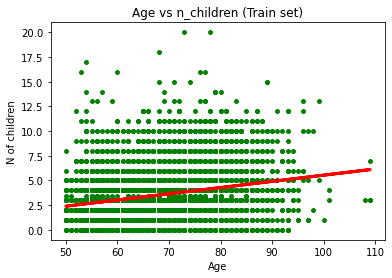

In [71]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs n_children (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('N of children')
plot_test.show()

1 - The slope is 0.06. It indicates a positive relationship between age and n of children(as X rises, so does y).
2 - MSE is 6.0 . That means the Regresson line passes fairly close to the observations. The model which represents this data can accurately predict the influence of distance to a metro station on the price of a unit
3 - R2 score for the model is 0.059. It indicates a poor fit.The model does not explains well the variance in the data

Data Bias: As possible biases, we have the fact that there is an extreme value in relation to the number of children and age. As for the number of individuals, I do not believe it is a problem, given that the sample has approximately 9,700 people. We can still have as biases the form of collection

### Bonus: performance improvement after removing outliers

In [72]:
# Clean the extreme values from the "N of children" variable observed during the consistency checks.

Data_s_children_test = Data_s[Data_s['n_children'] <=6] 

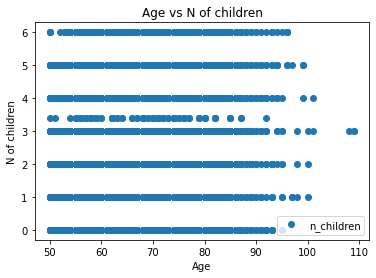

In [73]:
# See how the scatterplot looks without outliers.

Data_s_children_test.plot(x = 'age', y='n_children', style='o')  
plt.title('Age vs N of children')  
plt.xlabel('Age')  
plt.ylabel('N of children')  
plt.show()

In [74]:
# Reshape again.

X_2 = Data_s_children_test['age'].values.reshape(-1,1)
y_2 = Data_s_children_test['n_children'].values.reshape(-1,1)

In [75]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [76]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [77]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [78]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [79]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02368919]]
Mean squared error:  2.5630686238097735
R2 score:  0.012937371443384471


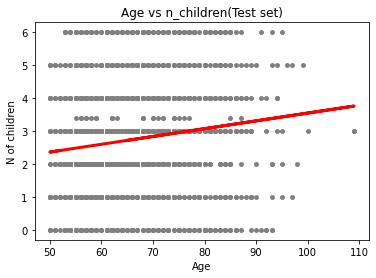

In [80]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Age vs n_children(Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('N of children')
plot_test.show()

In [81]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5.0,2.718084
1,0.0,2.812840
2,5.0,2.694395
3,1.0,2.623327
4,1.0,2.741773
5,3.0,2.954976
6,3.0,2.954976
7,2.0,2.433813
8,4.0,2.812840
9,5.0,2.670705
